In [ ]:
'''
USING PIP INSTALL HERE FOR ANY UNINSTALLED PACKAGES
'''
!pip install yfinance
!pip install emoji

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 860 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 175 kB 7.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7e6b3561bb954e5003a9514477ebdd4e2475d9a9eafedfc6d784927d2ff31a52
  Stored 

In [ ]:
'''
IMPORTING THE PACKAGES REQUIRED FOR 
EXPLORATORY DATA ANALYSIS:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress 
import seaborn
import tables
import yfinance as yf 
%matplotlib inline
import emoji

In [ ]:
'''
PACKAGES FOR PREPROCESSING:
'''
import tweepy
import math
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import datetime
import requests
from sklearn.ensemble import RandomForestRegressor



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


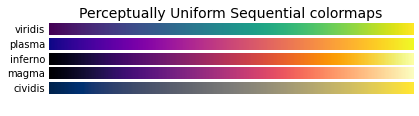

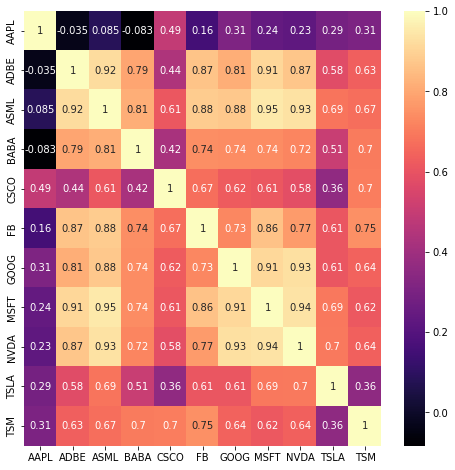

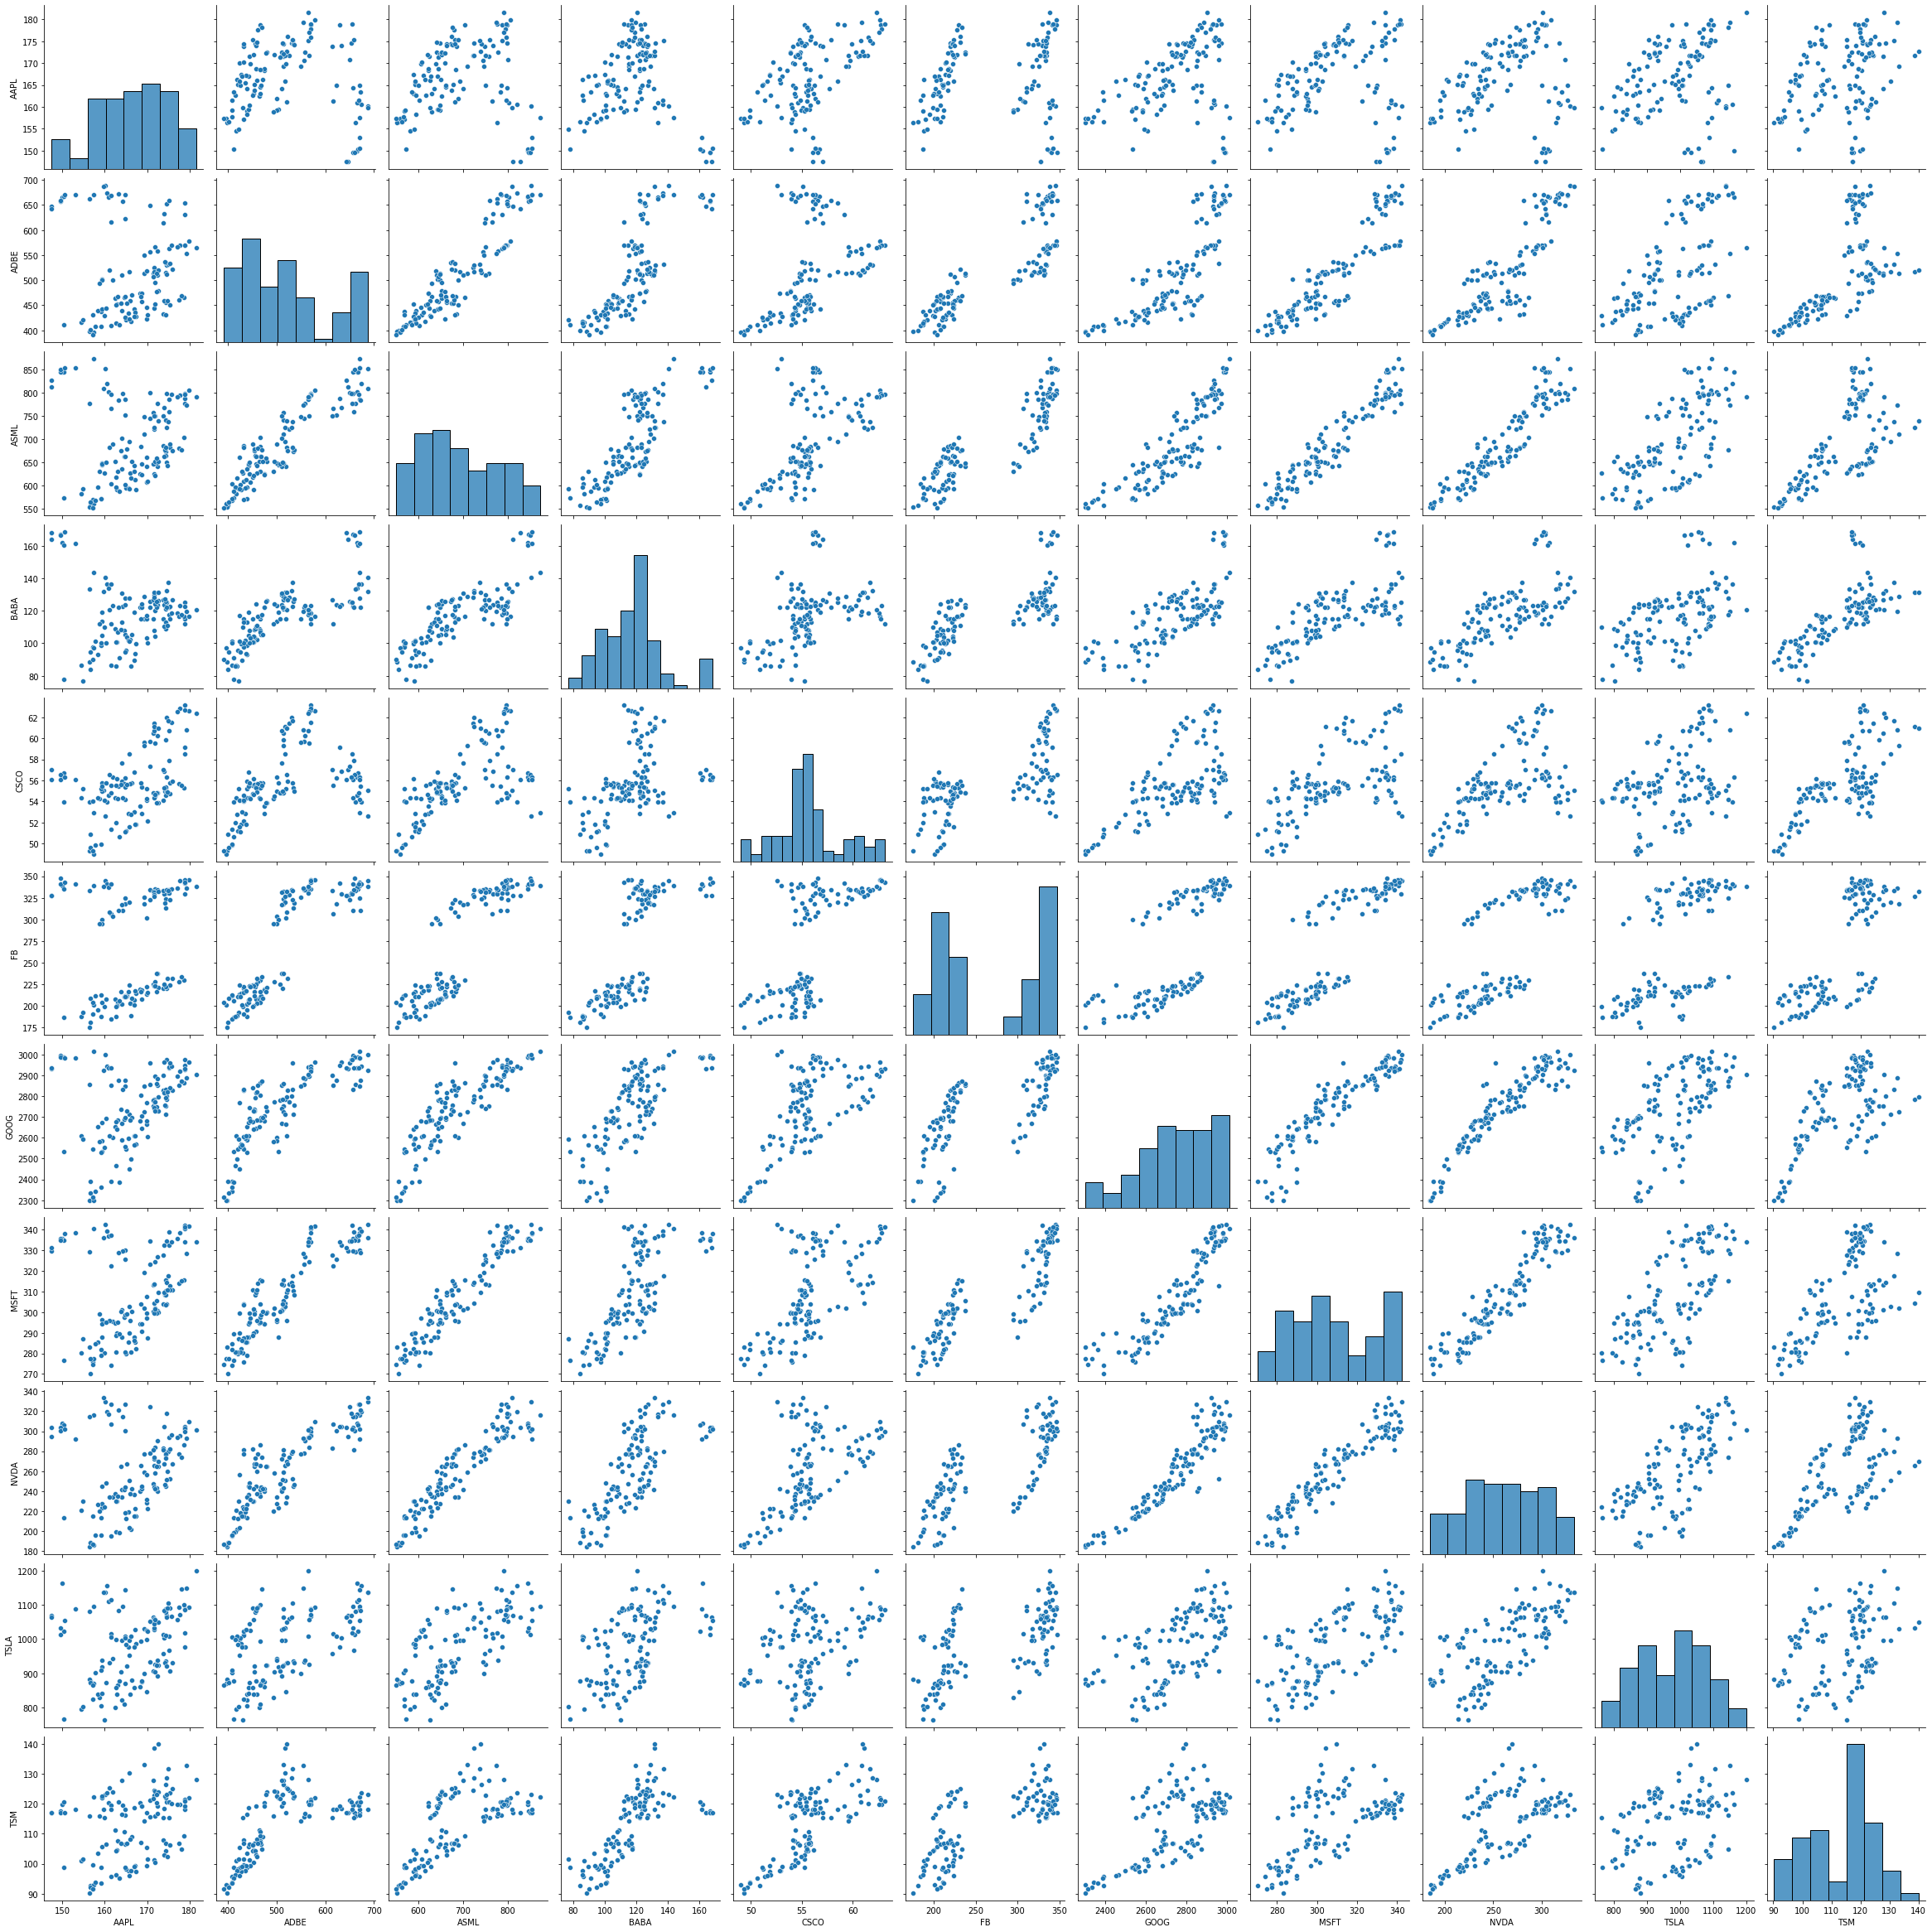

In [ ]:
'''
IN THIS CELL WE WILL BE LOOKING AT THE ADJ CLOSING PRICES OVER THE PAST 
6 MONTHS OF THE FOLLOWING TECHNOLOGY COMPANIES LISTED ON THE EXCHANGE WHICH
ARE SHOWN BELOW. 
WE WILL RUN A CORRELATION MATRIX TO SEE WHICH ARE NEGATIVELY/POSITIVELY/UNCORRELATED
STOCKS.
'''


#DOWNLOAD THE PRICES DATAFRAME
prices = yf.download("TSLA", start="2017-01-01", end="2022-04-14")

# Have a list of tech stock tickers
tickers = [ 'AAPL', 'TSLA', 'GOOG', 'MSFT', 'FB', 'NVDA', 'TSM', 'BABA', 'ASML', 'CSCO', 'ADBE']

# Get 6-month historic quotes for tickers
df = yf.download(tickers,period='6mo')['Adj Close']

#Create a visually pleasing colour code to differeniate the stocks and their correlation
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])



'''HEATMAP OF THE CORRELATION MATRIX OF THE COMPANIES MENTIONED ABOVE 
WITH A SCAL FROM 0-1 TO SHOW THE CORRELATION'''
plt.figure(figsize = (8,8))
seaborn.heatmap(df.corr(), annot=True, cmap="magma")
#Simple heatmap showingg the correlation between each stock price

'''COMPARING THE CORRELATION BY PLOTTING THE VALUES OF CORRELATION'''
#compare pairplot and heatmap positive and negative correlation
df_pairplot = df.dropna()
seaborn.pairplot(df_pairplot, height=3)

In [ ]:
'''NOW WERE GOING TO DO THE PREPROCESSING FOR THE O-H-L-C(OPEN,HIGH,LOW,AND CLOSE) PRICE'''
def OHLC_preprocessing(stock,start_date,end_date):
    

    '''
    WE WILL ATTEMPT THE FOLLOWING:
    1)PULL THE TICKER DATAFRAME USING YAHOO FINANCE 
    2)TRANSFORM THE TICKER DATAFRAME INTO A CSV FILE 
    3)READ THE CSV FILE AND PUT IT INTO A VARIABLE 'data' 
    '''
    #DOWNLOAD THE DATAFRAME
    df=yf.download(stock,start=start_date,end=end_date)
    data=pd.DataFrame(data=df,columns=['Date','Close'])
    df.to_csv('stock_ticker_df.csv')
    data=pd.read_csv('stock_ticker_df.csv')


    '''
    HERE WE IMPLIMENT THE FORMAT FOR THE DATE TO BE IN THE FORM OF
    YYYY-MM-DD(YYYY:YEAR/MM:MONTH/DD:DAY)
    AFTER WHICH SET THE DATE AS THE INDEX IT TO PLOT THE CLOSING PRICE HISTORY
    ACCORDING TO THE DATE
    '''
    #CHANGING THE DATE FORMAT AND INDEXING IT
    data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
    data.index=data['Date']
    plt.figure(figsize=(16,8))
    plt.plot(data["Close"],label='Close Price history')


    '''
    WE WILL PERFORM THE FOLLOWING:
    1)FIRST SORT THE DATAFRAME ACCORDING TO DATE
    2)CREATE A NEW DATAFRAME WITH CLOSING PRICE AND DATE COLUMNS
    3)LOOP IT AND ADD IT TO THE 'new_df'
    '''
    #SORT THE DATAFRAME ACCORDING TO DATETIME
    data_1=data.sort_index(ascending=True,axis=0)
    
    #CREATE A NEW DATAFRAME WITH DATE/CLOSE PRICE COLUMNS
    new_df=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

    #LOOP THE 
    for i in range(0,len(data_1)):
      new_df['Date'][i]=data_1['Date'][i]
      new_df['Close'][i]=data_1['Close'][i]
    

    '''
    THE LAST BIT OF OHLC PREPROCESSING CONSISTS OF THE FOLLWING:
    1)NORMALIZE THE DATASET USING 'MinMaxScaler'
    2)REMOVE ALL COLUMNS EXCEPT 'Close' PRICE COLUMN
    3)CREATE THE TRAINING DATA LENGTH
    4)CREATE THE TRAIN/TEST SPLIT
    5)FOR LSTM WE HAVE TO CONVERT THE TWO DIMENSIONAL TRAIN DATA INTO THREE DIMENSIONS 
    FOR THE LSTM MODEL
    '''
    #REMOVE COLUMNS EXCEPT 'Close'
    close_df=new_df.filter(['Close'])

    #RETURN DICTIONARY 
    final_df=close_df.values

    #MAKE SCALER FUNCTION
    scaler=MinMaxScaler(feature_range=(0,1))

    #APPLY SCALER ON THE DATAFRAME
    scaled_data=scaler.fit_transform(final_df)

    #CREATE TRAINING DATA LENGTH
    training_data_len=math.ceil(len(final_df)*0.8)
    train_data=scaled_data[0:training_data_len,:]
    x_train,y_train=[],[]

    '''
    RUN A FOR LOOP TO USE THE PAST SIXTY DAYS CLOSING PRICE TO APPEND INTO 'x_train'
    AND APPEND THE SIXTY-FIRST INTO THE Y_TRAIN
    '''
    #TAKE THE DATA FOR THE LAST SIXTY DAYS AND THE NEXT DAY IN 'x_train' & 'y_train' respectively 
    for i in range(60,len(train_data)):
      x_train.append(scaled_data[i-60:i,0])
      y_train.append(scaled_data[i,0])

    #TRANSFORM THE DATA INTO TWO ARRRAYS 
    x_train,y_train=np.array(x_train),np.array(y_train)

    #TRASNFORM THE TWO DIMENSIONAL DATA INTO THREE FOR THE MODEL REQUIREMENTS 
    x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

    return x_train


[*********************100%***********************]  1 of 1 completed


array([[[0.19223147],
        [0.18948977],
        [0.22132521],
        ...,
        [0.1453161 ],
        [0.15003807],
        [0.17578069]],

       [[0.18948977],
        [0.22132521],
        [0.19116533],
        ...,
        [0.15003807],
        [0.17578069],
        [0.21325211]],

       [[0.22132521],
        [0.19116533],
        [0.16420411],
        ...,
        [0.17578069],
        [0.21325211],
        [0.25346536]],

       ...,

       [[0.43381566],
        [0.45986299],
        [0.49352623],
        ...,
        [0.84752482],
        [0.85011428],
        [0.85041899]],

       [[0.45986299],
        [0.49352623],
        [0.50114238],
        ...,
        [0.85011428],
        [0.85041899],
        [0.89444032]],

       [[0.49352623],
        [0.50114238],
        [0.5044935 ],
        ...,
        [0.85041899],
        [0.89444032],
        [0.9012948 ]]])

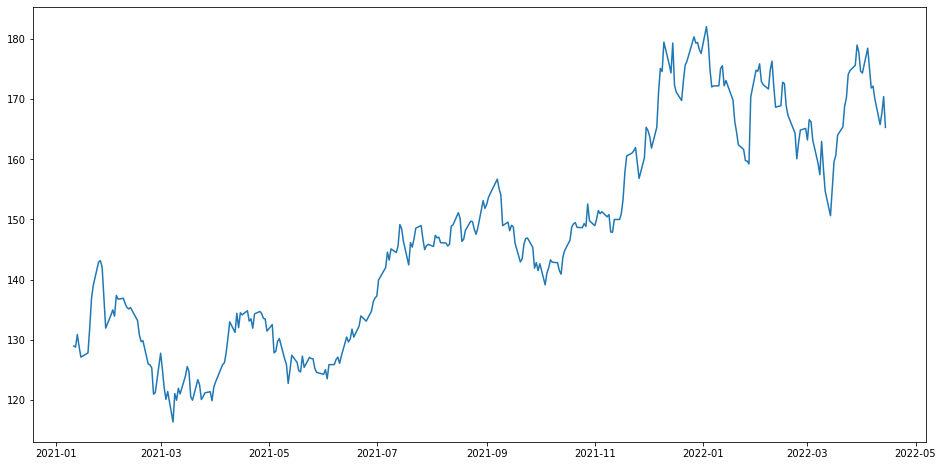

In [ ]:
#CALLING THE OHLC PREPROCESSING FUNCTION 
a=OHLC_preprocessing('AAPL','2021-01-10','2022-04-15')
a

In [ ]:
!pip install searchtweets


In [ ]:
!pip install emoji

In [ ]:
class twitter_sentiment_analysis():

  '''  
  HERE I HAVE INTITALISED THE ATTRIBUTES WE NEED TO RUN A SEARCH ON TWEETS 
  AND THE TICKER. THE VARIABLES RETURNED FROM THE FUNCTIONS BELOW ARE INTIALISED AND
  USED IN OTHER FUNCTIONS.
  '''
  def __init__(self,name,stock_name,start,end,predict_days):
      #CREATING THE DATASTRUCTURES REQUIRED IN THE CLASS 
    self.name=name
    self.stock_name=stock_name
    self.start = start
    self.end = end
    self.predict_days = predict_days
    self.tweets=self.get_tweets()
    self.p_d=self.price_date()
    #self.tweets=pd.DataFrame(columns=['Date','Tweets'])
    self.tweets_df=self.club_tweets()
    #self.clean=self.clean_tweets()
    self.cleaner=self.clean_tweets()
    self.final=self.final_df()

  '''
  THE 'get_news()' FUNCTION USES A NEW'S API TO PULL NEWS HEADLINE INTO A JSON
  DIRECTORY. IN THE DIRECTORY WE STORE THE TITLE AND DATE FOR EACH HEADLINE. 
  AFTER THAT A SENTIMENT ANALYSIS IS RUN TO GET THE POSITIVE/NEUTRAL/NEGATIVE/COMPOUND
  SENTIMENT ON EACH HEADLINE AND PUT INTO A DATAFRAME ALONG WITH THE CLOSING PRICE HISTORY
  IN ANOTHER COLUMN.
  '''
  def get_tweets(self):
    
    consumer_key = 'AWkqjQztwqJ1UpHXlMCe5FpQa'
    consumer_secret = 'rGKorWs1Ou9zHygQ3YmU3GQQJUOHWSCXJ0IHYeVGO5pUmUED5R'
    access_key= '292442479-obLaGy67xpOYsXTN5Q6D8KUVYYFG7pocPED0f71E'
    access_secret = 'xjPYh2yK0lXi60WNGrQ9qxqdCiByiosLztCQNkZEU0amv'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    # Define the search term and the date_since date as variables
    search_words = "#wildfires"
    date_since = "2022-04-01"

    # Collect tweets
    tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since).items()

    tweet_df=pd.DataFrame(columns=['TEXT','DATE'])

    # Iterate and print tweets
    users_text = [[tweet.text, tweet.created_at] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                    columns=['Text', "Date"])
    
    tweet_text['Date_new']=tweet_text['Date'].dt.date
    tweet_text=tweet_text.drop(columns=['Date'])

    return tweet_text
  

  '''
  THE FUNCTION BELOW COLLECTS THE HISTORICAL TICKER DATA.
  AFTER WHICH WE CONVERT IT INTO A CSV FILE TO GET THE DATE COLUMN.
  WE THEN PUT THE CLOSING PRICE AND THE DATE COLUMN INTO A DATAFRAME.
  '''
  def price_date(self):

    ticker_df=yf.download(self.name,self.start,self.end)
    ticker_df.to_csv('ticker_df.csv')
    df_ticker = pd.read_csv("ticker_df.csv") 
    close_date=pd.DataFrame(data=df_ticker,columns=['Date','Close'])

    return close_date
  

  '''
  THE FUNCTION BELOW IS TO CLUB ALL THE TWEETS
  IN A SINGLE ROW WITH THE DATE AS THE INDEX 
  '''
  def club_tweets(self):
    cdata=self.tweets
    #cdata.sort_values(by='Date_New', inplace=True)
    tweets=pd.DataFrame(columns=['Date','Tweets'])
    indx=0
    get_tweet=""
    for i in range(0,len(cdata)-1):
        get_date=cdata.Date_new.iloc[i]
        next_date=cdata.Date_new.iloc[i+1]
        if(str(get_date)==str(next_date)):
            get_tweet=get_tweet+cdata.Text.iloc[i]+" "
        if(str(get_date)!=str(next_date)):
            temp_df = pd.DataFrame([[get_date, 
                                    get_tweet]], columns = ['Date','Tweets'])
            tweets = pd.concat([tweets, temp_df], axis = 0).reset_index(drop = True)
            get_tweet=" "  

    return tweets  


  '''
  THE FUNCTION BELOW IS TO CLEAN EACH ROW OF TWEETS WITH THE CONDITIONS GIVEN BELOW
  '''
  def clean_tweets(self):
    #data=self.tweets_df.to_csv("Tweets.csv")
    data=pd.DataFrame(data=self.tweets_df,columns=['Date','Tweets'])
    cdata=pd.DataFrame(columns=['Date','Tweets'])
    total=100
    index=0
    print(data)
    for index,row in data.iterrows():
        stre=row["Tweets"]
        my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
        my_new_string = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", stre) #Remove http links
        my_new_string = " ".join(stre.split())
        my_new_string = ''.join(c for c in stre if c not in emoji.UNICODE_EMOJI) #Remove Emojis
        my_new_string = stre.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
        temp_df = pd.DataFrame([[data["Date"].iloc[index],my_new_string]], columns = ['Date','Tweets'])
        cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    return cdata
  
  '''
  THE FUNCTION BELOW WILL CLUB THE DATE THE CLOSING PRICE AND THE TWEETS INTO ONE DATAFRAME.
  HERE FOUR MORE COLUMNS WILL BE ADDED FOR SENTIMENT ANALYSIS.
  '''
  def final_df(self):
    tweets=self.cleaner
    price=self.p_d
    indx=0
    tweets['Prices']=''
    for i in range (0,len(tweets)):
        for j in range (0,len(price)):
            get_tweet_date=tweets.Date.iloc[i]
            get_stock_date=price.Date.iloc[j]
            if(str(get_stock_date)==str(get_tweet_date)):
                tweets['Prices'].iloc[i] = int(price.Close[j])


    '''HERE WERE CONVERTING THE FLOAT VALUES TO INTEGER TO RUN THROUGH 
    THE SENTIMENT ANALYSER FUNCTION'''
    mean=0
    summ=0
    count=0
    for i in range(0,len(tweets)):
        if(tweets.Prices.iloc[i]!=""):
            summ=summ+int(tweets.Prices.iloc[i])
            count=count+1
    mean=summ/count
    for i in range(0,len(tweets)):
        if(tweets.Prices.iloc[i]==""):
            tweets.Prices.iloc[i]=int(mean)


    
    '''HERE WERE CREATING THE FINAL DATAFRAME WITH TWEETS PRICES AND SENTIMENTS '''
    tweets['Prices'] = tweets['Prices'].apply(np.int64)
    tweets["Comp"] = ''
    tweets["Negative"] = ''
    tweets["Neutral"] = ''
    tweets["Positive"] = ''

    sentiment_i_a = SentimentIntensityAnalyzer()
    for indexx, row in tweets.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', tweets.loc[indexx, 'Tweets'])
            sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
            tweets['Comp'].iloc[indexx] = sentence_sentiment['compound']
            tweets['Negative'].iloc[indexx] = sentence_sentiment['neg']
            tweets['Neutral'].iloc[indexx] = sentence_sentiment['neu']
            tweets['Positive'].iloc[indexx] = sentence_sentiment['pos']

        except TypeError:
            print (price.loc[indexx, 'Tweets'])
            print (indexx)

    return tweets

  def train_test_split(self):

    data=self.final_df()
    
    X = data[['Comp','Negative','Neutral','Positive']]
    y = data[['Prices']]
    
    #Predict days is the amount of latest days you would want to predict for
    X_train = X[:len(X)-self.predict_days]
    y_train = y[:len(X)-self.predict_days]
    X_test = X[len(X)-self.predict_days:]
    y_test = y[len(X)-self.predict_days:]

    
    
    #Fitting the random forest regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, np.ravel(y_train))

    #making prediction
    prediction = rf.predict(X_test) 
    #print(prediction,'\n', y_test)

    y_test = y_test.rename(columns={"Prices": "actual_price"}).reset_index()
    prediction = pd.DataFrame({'predicted_price': prediction})
    # print(prediction, '\n', y_test)
    # return y_test

    #Plotting the prediction
    ax = prediction.plot(title='Random Forest predicted prices')#predicted value
    ax.set_xlabel("Indexes")
    ax.set_ylabel("Stock Prices")
    fig = y_test.plot(ax = ax).get_figure()#actual value
    fig.savefig("random forest.png")




In [ ]:
tesla=twitter_sentiment_analysis('TSLA','TSLA','2022-04-25','2022-05-05',3)

KeyboardInterrupt: ignored

In [ ]:
tesla.final_df()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-05-07,RT @PopnMatters: A new report from Global Fore...,921,-0.9992,0.085,0.853,0.061
1,2022-05-06,RT @NMBewitched: Wildfires\nNMDog\nHere is th...,921,-0.9995,0.069,0.878,0.053
2,2022-05-05,@ClimateHuman @BannanBannan1 This is July of ...,921,-0.9995,0.119,0.789,0.092
3,2022-05-04,RT @NASAArmstrong: In honor of InternationalF...,952,-0.9968,0.087,0.839,0.074
4,2022-05-03,RT @AbqFoundation: All Together NM Fund is co...,909,0.9908,0.068,0.858,0.073
5,2022-05-02,RT @LoveWorld Peopl: BREAKING RUSSIA\n\n🔴RUSS...,902,-0.9968,0.082,0.847,0.071
6,2022-05-01,‘Turning the dial up’: US south-west braces f...,921,-0.9794,0.08,0.852,0.068
7,2022-04-30,RT @DavidZaber: Normal view and today's view....,921,-0.9999,0.113,0.85,0.037


In [ ]:
tesla.train_test_split()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyError: ignored

In [ ]:
'''
THIS CELL IS FOR THE SENTIMENT ANALYSIS OF THE NEWS HEADLINES.
WE WILL RUN A SENTIMENT ANALYSIS ON ANY NEWS HEADLINE FOR THE STOCK SYMBOL
BETWEEN THE TIME PERIOD THE USER WISHES TO ANALYSE THE GIVEN STOCK.
'''
class news_sentiment_analysis:

  '''
  HERE I HAVE INTITALISED THE ATTRIBUTES WE NEED TO RUN A SEARCH ON TWEETS 
  AND THE TICKER. THE VARIABLES RETURNED FROM THE FUNCTIONS BELOW ARE INTIALISED AND
  USED IN OTHER FUNCTIONS.
  '''
  def __init__(self,name,stock_name,start,end,predict_days):
      #CREATING THE DATASTRUCTURES REQUIRED IN THE CLASS 
    self.name=name
    self.stock_name=stock_name
    self.start = start
    self.end = end
    self.predict_days = predict_days
    self.stocks = self.get_stocks()
    self.news = self.get_news()



  '''
  THE 'get_news()' FUNCTION USES A NEW'S API TO PULL NEWS HEADLINE INTO A JSON
  DIRECTORY. IN THE DIRECTORY WE STORE THE TITLE AND DATE FOR EACH HEADLINE. 
  AFTER THAT A SENTIMENT ANALYSIS IS RUN TO GET THE POSITIVE/NEUTRAL/NEGATIVE/COMPOUND
  SENTIMENT ON EACH HEADLINE AND PUT INTO A DATAFRAME ALONG WITH THE CLOSING PRICE HISTORY
  IN ANOTHER COLUMN.
  '''
  def get_news(self):
    API_KEY = 'OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX'
  
    Date = []
    title = []

    start = datetime.datetime.strptime(self.start, "%Y-%m-%d")
    end = datetime.datetime.strptime(self.end, "%Y-%m-%d")

    days = (end-start).days + 1
    

    for i in range(0,days):
      start_date = self.start.split('-')
      date = datetime.datetime(int(start_date[0]), int(start_date[1]), int(start_date[2])) + datetime.timedelta(i)
      end_date = date.strftime('%Y-%m-%d')

      url = f'https://eodhistoricaldata.com/api/news?api_token={API_KEY}&s={self.stock_name}&offset=0&limit=10&from={end_date}&to={end_date}'
      response = requests.get(url)
      json  = response.json()

      Date.append(end_date)
      temp = ''
      for j in json:
        temp = temp + j['title']
      title.append(temp)

    temp_df = pd.DataFrame({'title' : title, 'Date': Date})

    stocks = self.stocks[['Date','Adj Close']]
    df = temp_df.merge(stocks, on='Date', how='inner')
    df['Date'] = pd.to_datetime(df['Date'])

    df["Comp"] = ''
    df["Negative"] = ''
    df["Neutral"] = ''
    df["Positive"] = ''

    import unicodedata
    sentiment_i_a = SentimentIntensityAnalyzer()
    for indexx, row in df.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'title'])
            sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
            df['Comp'].iloc[indexx] = sentence_sentiment['compound']
            df['Negative'].iloc[indexx] = sentence_sentiment['neg']
            df['Neutral'].iloc[indexx] = sentence_sentiment['neu']
            df['Positive'].iloc[indexx] = sentence_sentiment['compound']
        except TypeError:
            print (self.stocks.loc[indexx, 'title'])
            print (indexx)

    return df



  '''
  IN THIS FUNCTION WE PLOT A PIE CHART FOR THE PERCENTAGE OF POSTIVE TO NEGATIVE 
  NEWS HEADLINE SENTIMENT.
  '''
  def plot_news(self):
    temp_df = self.news
    posi=0
    nega=0
    for i in range (0,len(temp_df)):
        get_val=temp_df.Comp[i]
        if(float(get_val)<(0)):
            nega=nega+1
        if(float(get_val>(0))):
            posi=posi+1
    posper=(posi/(len(temp_df)))*100
    negper=(nega/(len(temp_df)))*100
    print("% of positive news= ",posper)
    print("% of negative news= ",negper)
    arr=np.asarray([posper,negper], dtype=int)
    plt.pie(arr,labels=['positive','negative'])
    plt.plot()

    return plt.plot()
    



  '''
  THIS FUNCTION USES THE YAHOO FINANCE PACKAGE TO PULL THE STOCK PRICE HISTORICAL DATA 
  FOR ANY STOCK SYMBOL OVER A VARIETY OF TIME FRAME AND PERIODS.
  '''
  def get_stocks(self):

      ticker_df = yf.download(tickers = self.stock_name,start=self.start,end=self.end).reset_index()
    
      df = ticker_df[['Open',	'High',	'Low',	'Close',	'Adj Close',	'Volume']]
      temp_date = []

      for i in range(0,len(ticker_df)):
        temp_date.append(str(ticker_df.Date.iloc[i]).split(' ')[0])

      temp_date = pd.DataFrame({'Date': temp_date})

      df = df.join(temp_date, how='inner')

      return df





  '''
  THE FOLLWING FUNCTION USES THE 'self.news' DATAFRAME. IT SELECTS THE 
  COMP, NEGATIVE, NEUTRAL, POSITIVE, AND ADJ CLOSE COLUMN TO CREATE THE 
  TRAIN/TEST SPLIT.
  '''
  def train_test(self):
    X = self.news[['Comp','Negative','Neutral','Positive']]
    y = self.news[['Adj Close']]
    
    #Predict days is the amount of latest days you would want to predict for
    X_train = X[:len(X)-self.predict_days]
    y_train = y[:len(X)-self.predict_days]
    X_test = X[len(X)-self.predict_days:]
    y_test = y[len(X)-self.predict_days:]

    
    
    #Fitting the random forest regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, np.ravel(y_train))

    #making prediction
    prediction = rf.predict(X_test) 
    #print(prediction,'\n', y_test)

    y_test = y_test.rename(columns={"Adj Close": "actual_price"}).reset_index()
    prediction = pd.DataFrame({'predicted_price': prediction})
    # print(prediction, '\n', y_test)
    # return y_test

    #Plotting the prediction
    ax = prediction.plot(title='Random Forest predicted prices')#predicted value
    ax.set_xlabel("Indexes")
    ax.set_ylabel("Stock Prices")
    fig = y_test.plot(ax = ax).get_figure()#actual value
    fig.savefig("random forest.png")



In [ ]:
apple = news_sentiment_analysis('apple','AAPL','2015-01-01','2021-03-15',10)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


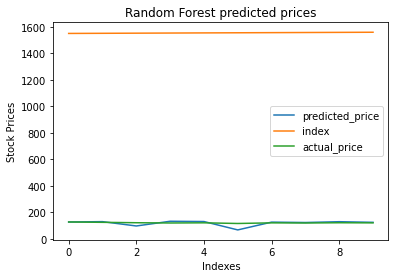

In [ ]:
apple.train_test()

In [ ]:
apple.news

,title,Date,Adj Close,Comp,Negative,Neutral,Positive
0,,2015-01-02,24.678246,0.0,0.0,0.0,0.0
1,,2015-01-05,23.983025,0.0,0.0,0.0,0.0
2,,2015-01-06,23.985283,0.0,0.0,0.0,0.0
3,,2015-01-07,24.321606,0.0,0.0,0.0,0.0
4,,2015-01-08,25.256098,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1554,Disney Stock Leaps To New All-Time High As Lag...,2021-03-08,115.502792,0.3094,0.047,0.879,0.3094
1555,4 High-Quality Technology Stocks Trading at At...,2021-03-09,120.197945,0.9337,0.018,0.784,0.9337
1556,"Schwab, TD Ameritrade Experts Talk Retail Trad...",2021-03-10,119.096138,0.6808,0.021,0.903,0.6808
1557,Warren Buffett's Net Worth Eclipses $100 Billi...,2021-03-11,121.061539,0.8313,0.0,0.898,0.8313


In [ ]:
apple_stock = apple.stocks[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
apple_news = apple.news.copy()
apple_df = pd.concat([apple_stock, apple_news], axis=1)
apple_df.tail(1)

,Open,High,Low,Close,Volume,title,Date,Adj Close,Comp,Negative,Neutral,Positive
1558,120.400002,121.169998,119.160004,121.029999,88105100,7 Of The Best Tech Dividend StocksNasdaq Slips...,2021-03-12,120.138397,0.9531,0.086,0.677,0.9531


In [ ]:
apple_df.head(1)

,Open,High,Low,Close,Volume,title,Date,Adj Close,Comp,Negative,Neutral,Positive
0,27.8475,27.860001,26.8375,27.3325,212818400,,2015-01-02,24.678246,0.0,0.0,0.0,0.0


# Model Implementation and Optimisation

## Preprocessing

### Normalising and Converting to lagged data

In [ ]:
from pandas import concat

# convert series to supervised learning by Jason Brownlee 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
    
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


### Full pre process timeline

In [ ]:
def pre_process(df, input_vars=["Adj Close"], output_var=["Adj Close"], lags=1 , split=0.8, lstm=True):
    '''
    Assumed input is a dataframe with a time series of data from earliest date
    to latest date. Returns a data split into X and y for train and test as 4 numpy arrays.
    Always needs an input in both input and output vars

    :param: df -- input dataframe
    :param: input_vars -- is either a string, or a list of strings that specify
            which columns are additional predictors from the input dataframe
    :param: output_var -- is the column that will be predicted.
    :param: -- lags is the number of days backwards that will be used for prediction of current time step.
    :param: -- lstm when True returns a 3 dimensional version of the dataset for 
                lstm purposes
    :param: -- split determines the train - test split ratio
    '''
    # Checking if the the output is in both
    INBOTH = False
    for var in input_vars:
      if var == output_var[0]:
        INBOTH = True
        input_vars.remove(output_var[0])
    
    model_features = output_var + input_vars
    print(model_features)

    # Train test split
    ratio = round(split*apple_df.shape[0])
    train_values = df.loc[:ratio, model_features].values
    test_values = df.loc[ratio:, model_features].values
    print('trained data size: ', train_values.shape, '\n    test data size: ', test_values.shape)

    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_values)
    test_scaled = scaler.transform(test_values)
    features = train_scaled.shape[1]

    # Dropping everything except the adj close in the current time step. ADJ close is
    # Assumed to be first column in
    drop = features-1

    # frame as supervised learning
    train_reframed = series_to_supervised(train_scaled, lags, 1)
    test_reframed = series_to_supervised(test_scaled, lags, 1)
    
    print('Before ---- ', list(train_reframed.columns))

    # drop columns we don't want to predict, if there is more than one column
    if drop != 0: 
      train_reframed.drop(train_reframed.columns[-drop:], axis=1, inplace=True)
      test_reframed.drop(test_reframed.columns[-drop:], axis=1, inplace=True)

    # If there is not INBOTH
    if not INBOTH and drop != 0:
        oldcols = list(test_reframed.columns)
        newcols = [col for col in oldcols if col[:4] != "var1"]
        newcols.append(oldcols[-1])
        train_reframed = train_reframed.loc[:, newcols].copy()
        test_reframed = test_reframed.loc[:, newcols].copy()
        # This is because we dropped the var1(t-i)
        features += -1

    print('After Drop ---- ', list(train_reframed.columns))

    print(train_reframed.head())
    print(test_reframed.head())

    values_train = train_reframed.values
    values_test = test_reframed.values

    train_X, train_y = values_train[:, :-1], values_train[:, -1]
    test_X, test_y = values_test[:, :-1], values_test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    if lstm:
        train_X = train_X.reshape((train_X.shape[0], lags, features))
        test_X = test_X.reshape((test_X.shape[0], lags, features))
  
    return train_X, train_y, test_X, test_y, scaler

## ML Models

### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

def fit_model(train_X, train_y, test_X, test_y, units, epochsN, batch_sizeN):
  print("Building model for " + str(units) + " units, " + str(epochsN) + " epochs and " + str(batch_sizeN) + " batch_size")
  # design network
  model= Sequential()
  model.add(LSTM(units, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X, train_y, epochs=epochsN, batch_size=batch_sizeN, validation_data=(test_X, test_y), verbose=0, shuffle=False)
  # plot training history
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('loss ')
  plt.legend()
  plt.show()
  yhat = model.predict(test_X)
  # invert scaling for forecast
  inv_yhat = concatenate((yhat, yhat), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  # invert scaling for actual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_y), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  # calculate RMSE
  rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  print('Test RMSE: %.3f' % rmse)
  plt.plot(inv_y, color = 'red', label = 'actual')
  plt.plot(inv_yhat, color = 'blue', label = 'predicted')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()
  return model, rmse

####Adjusting lags

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-1)', 'var1(t)']
   var1(t-1)   var1(t)
1   0.105719  0.085853
2   0.085853  0.085917
3   0.085917  0.095528
4   0.095528  0.122232
5   0.122232  0.123007
   var1(t-1)   var1(t)
1   0.848608  0.809572
2   0.809572  0.809849
3   0.809849  0.794707
4   0.794707  0.775393
5   0.775393  0.695485
Building model for 50 units, 50 epochs and 50 batch_size


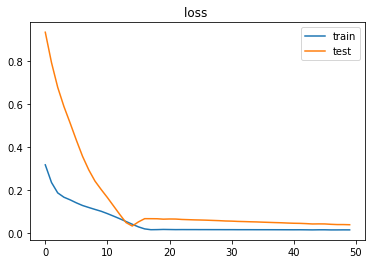

Test RMSE: 1.959


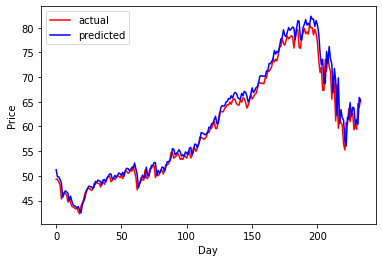

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-2)', 'var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-2)', 'var1(t-1)', 'var1(t)']
   var1(t-2)  var1(t-1)   var1(t)
2   0.105719   0.085853  0.085917
3   0.085853   0.085917  0.095528
4   0.085917   0.095528  0.122232
5   0.095528   0.122232  0.123007
6   0.122232   0.123007  0.105204
   var1(t-2)  var1(t-1)   var1(t)
2   0.848608   0.809572  0.809849
3   0.809572   0.809849  0.794707
4   0.809849   0.794707  0.775393
5   0.794707   0.775393  0.695485
6   0.775393   0.695485  0.715985
Building model for 50 units, 50 epochs and 50 batch_size


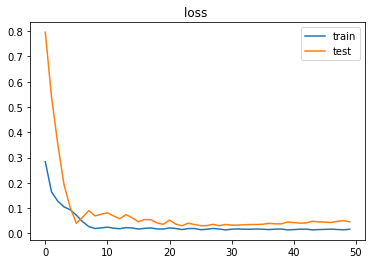

Test RMSE: 2.173


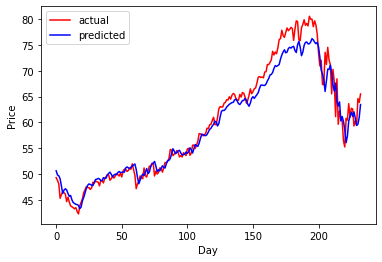

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
   var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
3   0.105719   0.085853   0.085917  0.095528
4   0.085853   0.085917   0.095528  0.122232
5   0.085917   0.095528   0.122232  0.123007
6   0.095528   0.122232   0.123007  0.105204
7   0.122232   0.123007   0.105204  0.111460
   var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
3   0.848608   0.809572   0.809849  0.794707
4   0.809572   0.809849   0.794707  0.775393
5   0.809849   0.794707   0.775393  0.695485
6   0.794707   0.775393   0.695485  0.715985
7   0.775393   0.695485   0.715985  0.731743
Building model for 50 units, 50 epochs and 50 batch_size


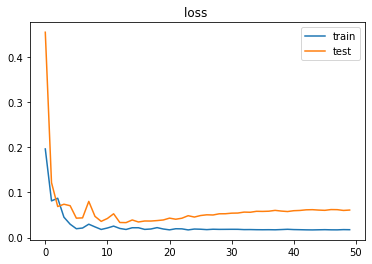

Test RMSE: 2.916


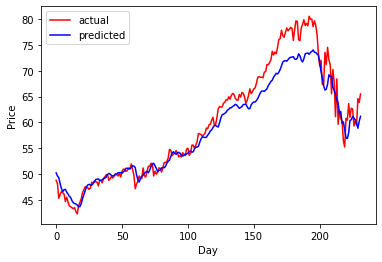

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
   var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
5   0.105719   0.085853   0.085917   0.095528   0.122232  0.123007
6   0.085853   0.085917   0.095528   0.122232   0.123007  0.105204
7   0.085917   0.095528   0.122232   0.123007   0.105204  0.111460
8   0.095528   0.122232   0.123007   0.105204   0.111460  0.108751
9   0.122232   0.123007   0.105204   0.111460   0.108751  0.089529
   var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
5   0.848608   0.809572   0.809849   0.794707   0.775393  0.695485
6   0.809572   0.809849   0.794707   0.775393   0.695485  0.715985
7   0.809849   0.794707   0.775393   0.695485   0.715985  0.731743
8   0.794707   0.775393   0.695485   0.715985   0.731743  0.725886
9   

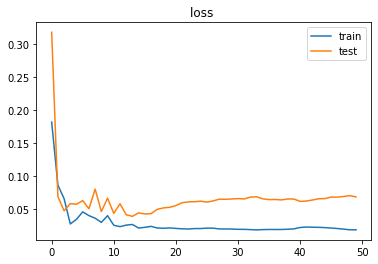

Test RMSE: 3.160


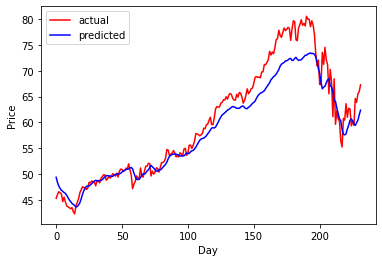

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-8)', 'var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-8)', 'var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
    var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  \
8    0.105719   0.085853   0.085917   0.095528   0.122232   0.123007   
9    0.085853   0.085917   0.095528   0.122232   0.123007   0.105204   
10   0.085917   0.095528   0.122232   0.123007   0.105204   0.111460   
11   0.095528   0.122232   0.123007   0.105204   0.111460   0.108751   
12   0.122232   0.123007   0.105204   0.111460   0.108751   0.089529   

    var1(t-2)  var1(t-1)   var1(t)  
8    0.105204   0.111460  0.108751  
9    0.111460   0.108751  0.089529  
10   0.108751   0.089529  0.084175  
11   0.089529   0.084175  0.101785  
12   0.084175   0.101785  0.107139  
    var1

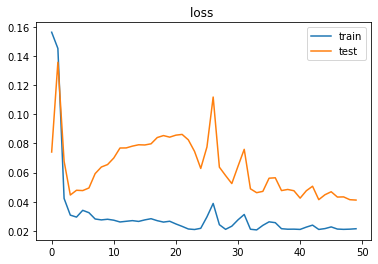

Test RMSE: 2.068


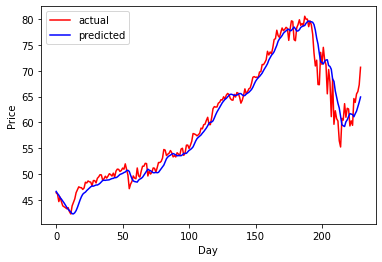

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-10)', 'var1(t-9)', 'var1(t-8)', 'var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-10)', 'var1(t-9)', 'var1(t-8)', 'var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)']
    var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  \
10    0.105719   0.085853   0.085917   0.095528   0.122232   0.123007   
11    0.085853   0.085917   0.095528   0.122232   0.123007   0.105204   
12    0.085917   0.095528   0.122232   0.123007   0.105204   0.111460   
13    0.095528   0.122232   0.123007   0.105204   0.111460   0.108751   
14    0.122232   0.123007   0.105204   0.111460   0.108751   0.089529   

    var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
10   0.105204   0.111460   0.108751   0.089529  0.084175  
11   0.111460   0.108751   0.089529   0.084175  0.10

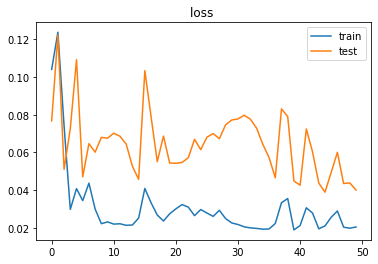

Test RMSE: 2.047


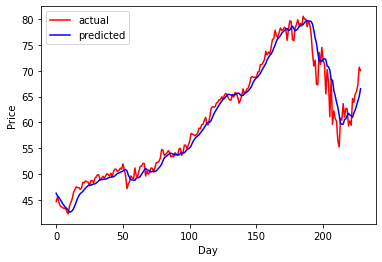


Test RMSE of 1 lags: 1.9585307290730274

Test RMSE of 2 lags: 2.172721771867937

Test RMSE of 3 lags: 2.9156194154991217

Test RMSE of 5 lags: 3.160201709441363

Test RMSE of 8 lags: 2.0682748267579654

Test RMSE of 10 lags: 2.047480640811607

Best result: 1.9585307290730274 of 1 of lag


In [ ]:
optimized = []
rmseS = []
count = 0
lags = [1,2,3,5,8,10]
for n in lags:
  train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close"], output_var=["Adj Close"], lags=n , split=0.7, lstm=True)
  ValTest_IX = round(test_X.shape[0] / 2)
  val_X = test_X[:ValTest_IX]
  val_y = test_y[:ValTest_IX]
  test_X = test_X[ValTest_IX:]
  test_y = test_y[ValTest_IX:]
  model = fit_model(train_X, train_y, val_X, val_y,50,50,50)
  rmse = model[1]
  rmseS.append(rmse)
  optimized.append([rmse,50,50,50,n])
while count < len(rmseS):
  print("\nTest RMSE of " + str(lags[count]) +" lags: " + str(rmseS[count]))
  count += 1
best_lag = lags[rmseS.index(min(rmseS))]
print("\nBest result: " + str(min(rmseS)) + " of " + str(best_lag) + " of lag")

####Adjusting batch size

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (468, 1)
Before ----  ['var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-1)', 'var1(t)']
   var1(t-1)   var1(t)
1   0.105719  0.085853
2   0.085853  0.085917
3   0.085917  0.095528
4   0.095528  0.122232
5   0.122232  0.123007
   var1(t-1)   var1(t)
1   0.848608  0.809572
2   0.809572  0.809849
3   0.809849  0.794707
4   0.794707  0.775393
5   0.775393  0.695485
Building model for 50 units, 50 epochs and 32 batch_size


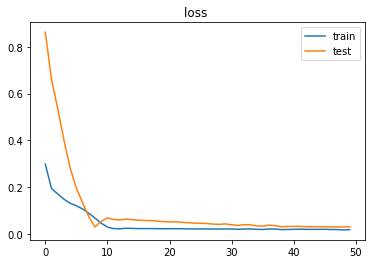

Test RMSE: 1.648


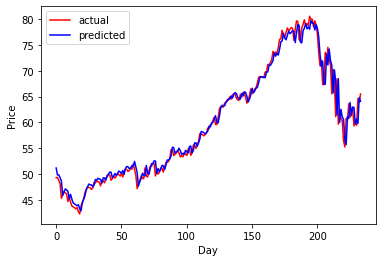

Building model for 50 units, 50 epochs and 64 batch_size


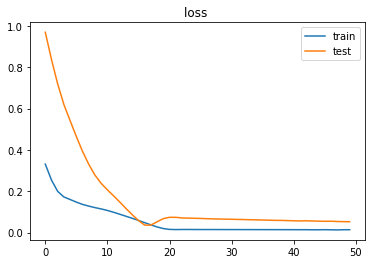

Test RMSE: 2.587


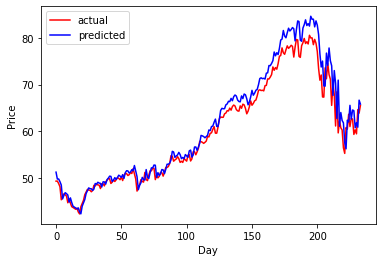

Building model for 50 units, 50 epochs and 128 batch_size


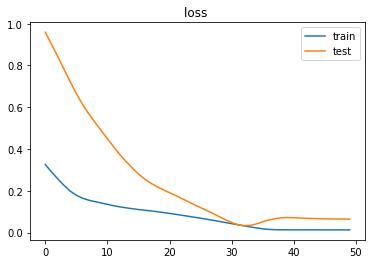

Test RMSE: 3.095


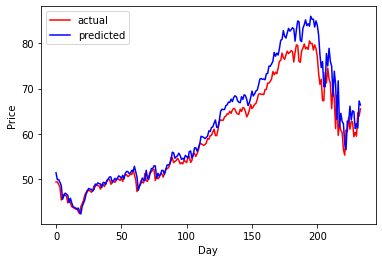

Building model for 50 units, 50 epochs and 256 batch_size


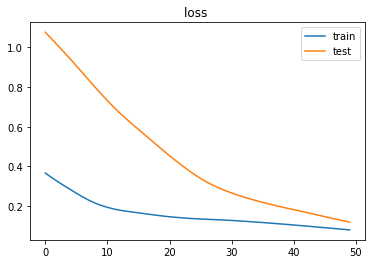

Test RMSE: 4.818


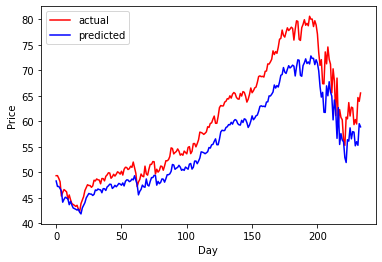

Building model for 50 units, 50 epochs and 512 batch_size


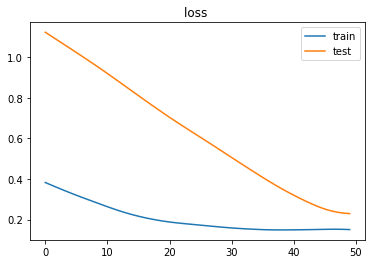

Test RMSE: 9.442


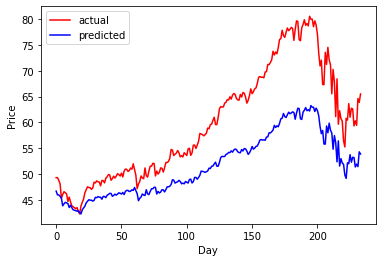

Building model for 50 units, 50 epochs and 1024 batch_size


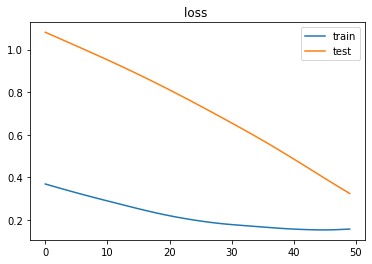

Test RMSE: 12.981


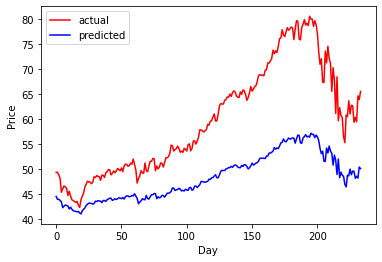

Building model for 50 units, 50 epochs and 2048 batch_size


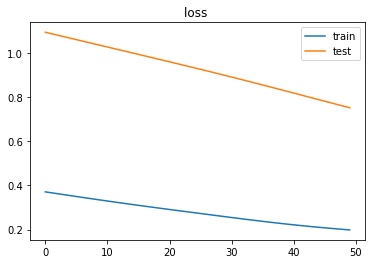

Test RMSE: 27.739


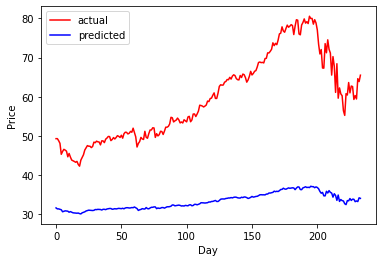

Building model for 50 units, 50 epochs and 4096 batch_size


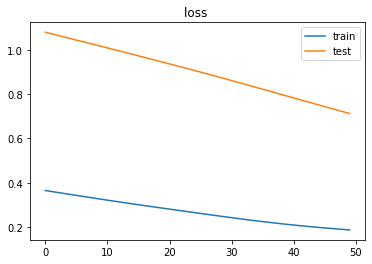

Test RMSE: 26.342


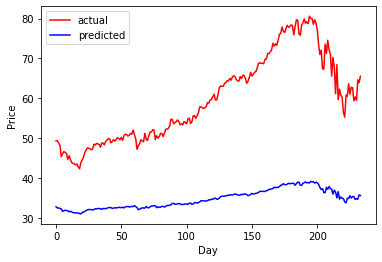


Test RMSE of a batch size of 32: 1.6482342997013875

Test RMSE of a batch size of 64: 2.5872955074999906

Test RMSE of a batch size of 128: 3.095191320982596

Test RMSE of a batch size of 256: 4.8184898287923215

Test RMSE of a batch size of 512: 9.442063576361308

Test RMSE of a batch size of 1024: 12.980955611001189

Test RMSE of a batch size of 2048: 27.73857764563289

Test RMSE of a batch size of 4096: 26.3415375276042

Best result: 1.6482342997013875 of 32 batch_size


In [ ]:
train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
ValTest_IX = round(test_X.shape[0] / 2)
val_X = test_X[:ValTest_IX]
val_y = test_y[:ValTest_IX]
test_X = test_X[ValTest_IX:]
test_y = test_y[ValTest_IX:]
rmseS = []
count = 0
test = [32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in test:
  model = fit_model(train_X, train_y, val_X, val_y,50,50,n)
  rmse = model[1]
  rmseS.append(rmse)
  optimized.append([rmse,50,50,n])
while count < len(rmseS):
  print("\nTest RMSE of a batch size of " + str(test[count]) +": " + str(rmseS[count]))
  count += 1
best_batch_size = test[rmseS.index(min(rmseS))]
print("\nBest result: " + str(min(rmseS)) + " of " + str(best_batch_size) + " batch_size")

####Adjusting hidden units

Building model for 32 units, 50 epochs and 32 batch_size


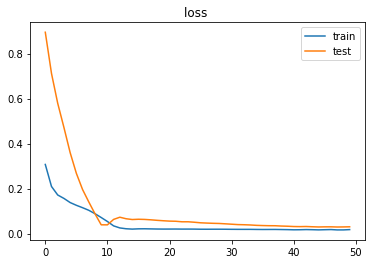

Test RMSE: 1.651


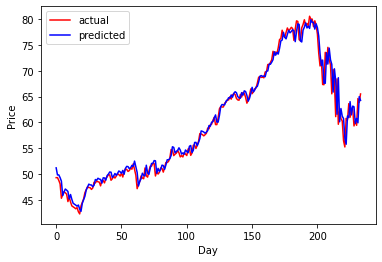

Building model for 64 units, 50 epochs and 32 batch_size


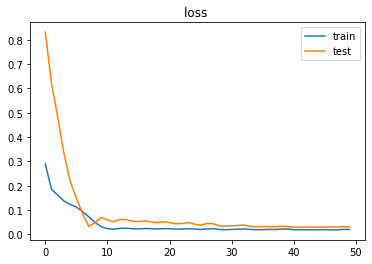

Test RMSE: 1.663


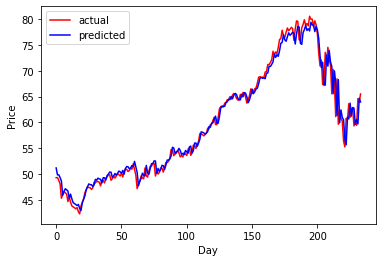

Building model for 128 units, 50 epochs and 32 batch_size


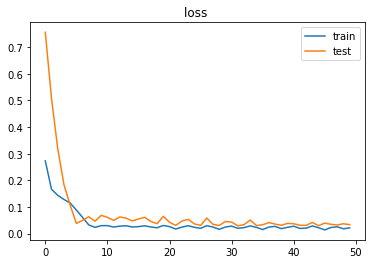

Test RMSE: 1.720


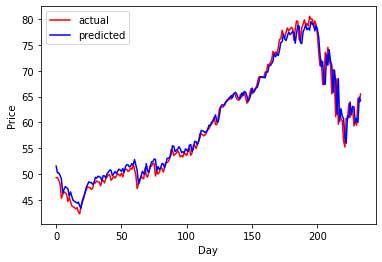

Building model for 256 units, 50 epochs and 32 batch_size


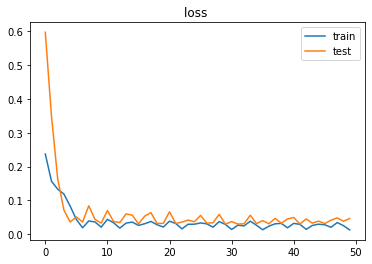

Test RMSE: 2.211


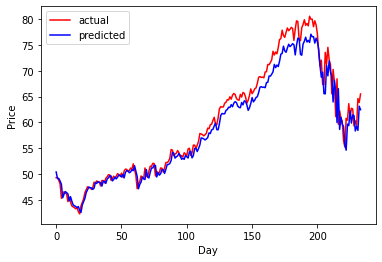

Building model for 512 units, 50 epochs and 32 batch_size


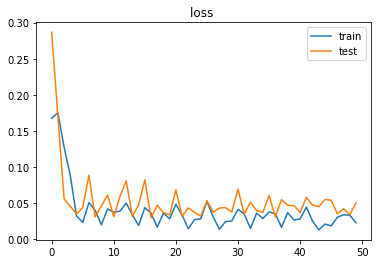

Test RMSE: 2.415


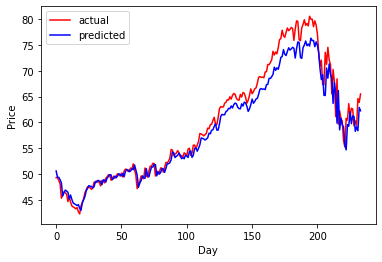

Building model for 1024 units, 50 epochs and 32 batch_size


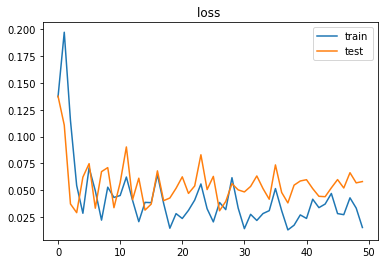

Test RMSE: 2.709


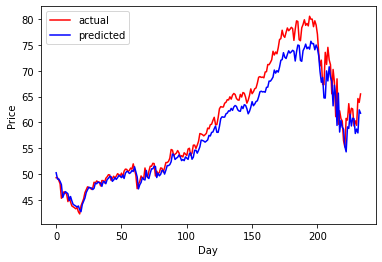

Building model for 2048 units, 50 epochs and 32 batch_size


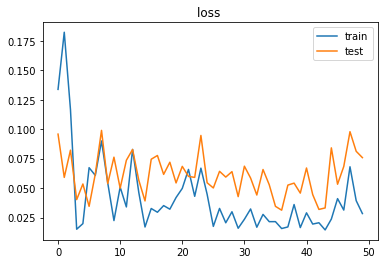

Test RMSE: 3.262


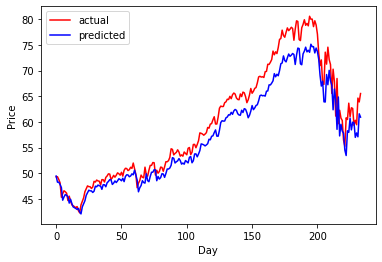

Building model for 4096 units, 50 epochs and 32 batch_size


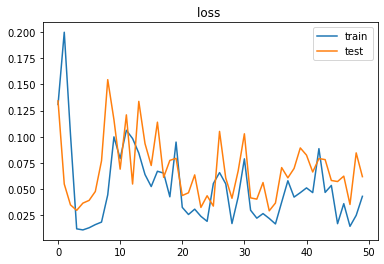

Test RMSE: 2.707


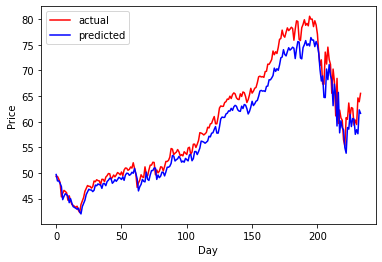


Optimized test RMSE of 32 units: 1.6513368875826344

Optimized test RMSE of 64 units: 1.6629114316330897

Optimized test RMSE of 128 units: 1.7196970345630072

Optimized test RMSE of 256 units: 2.21080774709665

Optimized test RMSE of 512 units: 2.414770883761745

Optimized test RMSE of 1024 units: 2.7091472839308355

Optimized test RMSE of 2048 units: 3.261814504164968

Optimized test RMSE of 4096 units: 2.7073204368884127

Best result: 1.6513368875826344 of 32 units


In [ ]:
rmseS = []
count = 0
test = [32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in test:
  model = fit_model(train_X, train_y, val_X, val_y,n,50,best_batch_size)
  rmse = model[1]
  rmseS.append(rmse)
  optimized.append([rmse,n,50,best_batch_size])
while count < len(rmseS):
  print("\nOptimized test RMSE of " + str(test[count]) +" units: " + str(rmseS[count]))
  count += 1
best_units = test[rmseS.index(min(rmseS))]
print("\nBest result: " + str(min(rmseS)) + " of " + str(best_units) + " units")

####Adjusting epochs

Building model for 32 units, 32 epochs and 32 batch_size


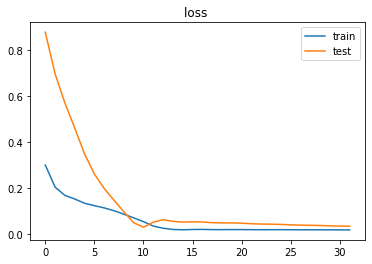

Test RMSE: 1.826


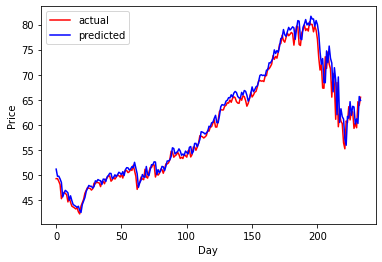

Building model for 32 units, 64 epochs and 32 batch_size


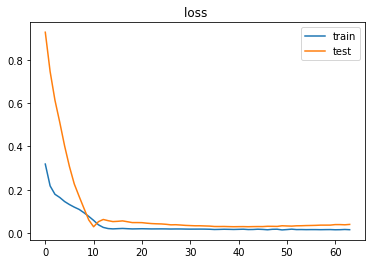

Test RMSE: 2.020


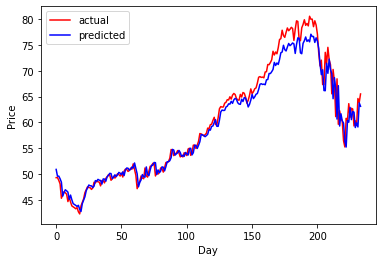

Building model for 32 units, 128 epochs and 32 batch_size


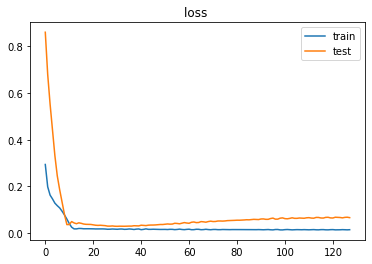

Test RMSE: 3.272


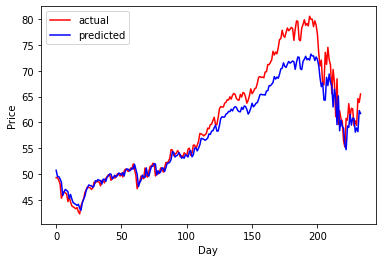

Building model for 32 units, 256 epochs and 32 batch_size


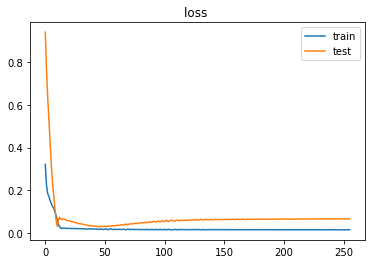

Test RMSE: 3.196


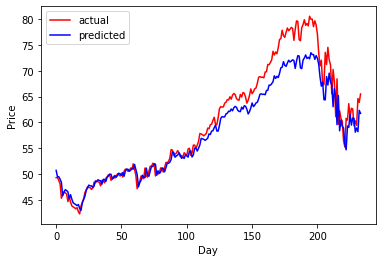

Building model for 32 units, 512 epochs and 32 batch_size


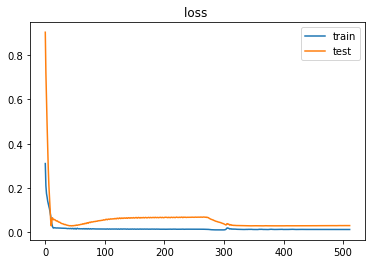

Test RMSE: 1.660


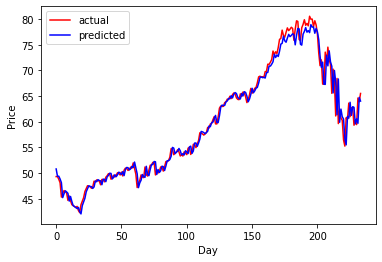

Building model for 32 units, 1024 epochs and 32 batch_size


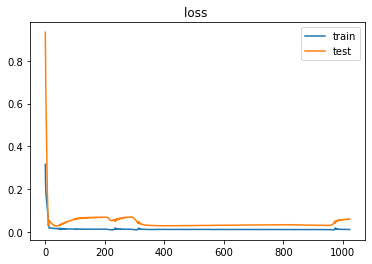

Test RMSE: 3.017


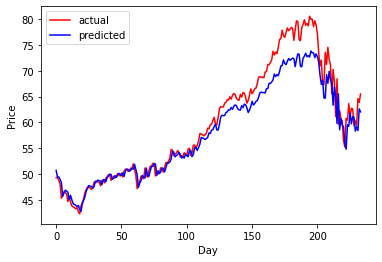

Building model for 32 units, 2048 epochs and 32 batch_size


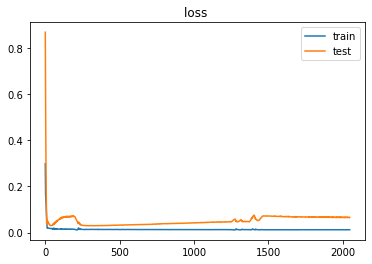

Test RMSE: 3.218


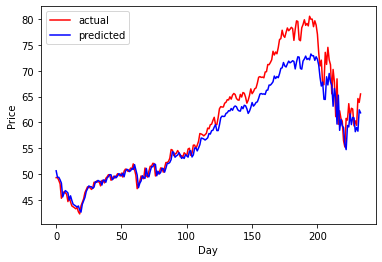

Building model for 32 units, 4096 epochs and 32 batch_size


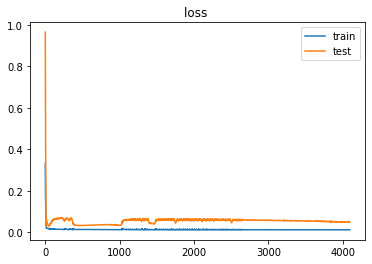

Test RMSE: 2.450


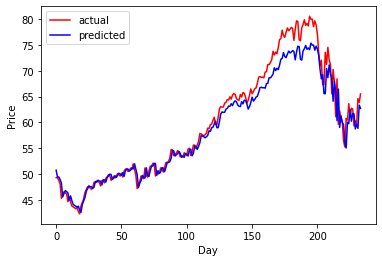


Optimized test RMSE of 32 epochs: 1.8264938700933626

Optimized test RMSE of 64 epochs: 2.0202321784631656

Optimized test RMSE of 128 epochs: 3.272072344706438

Optimized test RMSE of 256 epochs: 3.1955103767954562

Optimized test RMSE of 512 epochs: 1.6597821356459013

Optimized test RMSE of 1024 epochs: 3.017412480605105

Optimized test RMSE of 2048 epochs: 3.21774963072214

Optimized test RMSE of 4096 epochs: 2.450160925964989

Best result: 1.6597821356459013 of 512 epochs


In [ ]:
rmseS = []
count = 0
test = [32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in test:
  model = fit_model(train_X, train_y, val_X, val_y,best_units,n,best_batch_size)
  rmse = model[1]
  rmseS.append(rmse)
  optimized.append([rmse,best_units,n,best_batch_size])
while count < len(rmseS):
  print("\nOptimized test RMSE of " + str(test[count]) +" epochs: " + str(rmseS[count]))
  count += 1
best_epochs = test[rmseS.index(min(rmseS))]
print("\nBest result: " + str(min(rmseS)) + " of " + str(best_epochs) + " epochs")

####Defining function for dropout

In [ ]:
def fit_model_dropout(train_X, train_y, test_X, test_y, units, epochsN, batch_sizeN,dropout):
  print("Building model for " + str(units) + " units, " + str(epochsN) + " epochs, " + str(batch_sizeN) + " batch_size, and " + str(dropout) + " dropout")
  # design network
  model= Sequential()
  model.add(LSTM(units, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dropout(dropout))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X, train_y, epochs=epochsN, batch_size=batch_sizeN, validation_data=(test_X, test_y), verbose=0, shuffle=False)
  # plot training history
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('loss ')
  plt.legend()
  plt.show()
  yhat = model.predict(test_X)
  # invert scaling for forecast
  inv_yhat = concatenate((yhat, yhat), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  # invert scaling for actual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_y), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  # calculate RMSE
  rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  print('Test RMSE: %.3f' % rmse)
  plt.plot(inv_y, color = 'red', label = 'actual')
  plt.plot(inv_yhat, color = 'blue', label = 'predicted')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()
  return model, rmse

####Adjusting dropout

Building model for 32 units, 512 epochs, 32 batch_size, and 0.1 dropout


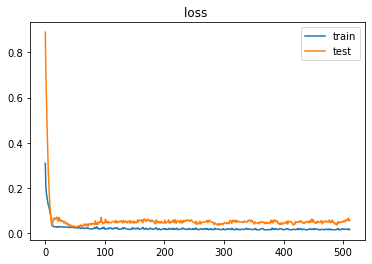

Test RMSE: 2.792


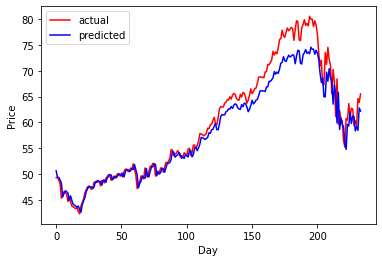

Building model for 32 units, 512 epochs, 32 batch_size, and 0.2 dropout


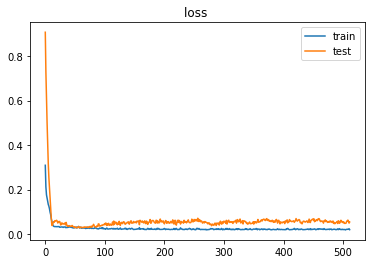

Test RMSE: 2.621


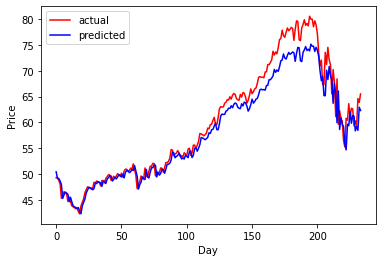

Building model for 32 units, 512 epochs, 32 batch_size, and 0.3 dropout


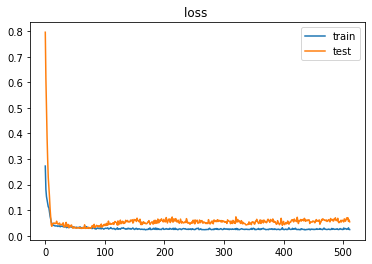

Test RMSE: 2.645


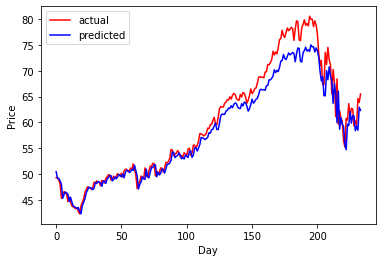

Building model for 32 units, 512 epochs, 32 batch_size, and 0.4 dropout


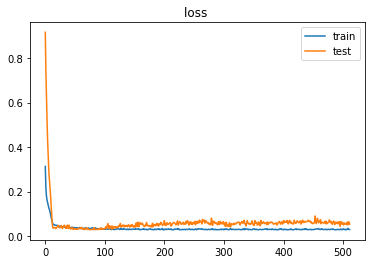

Test RMSE: 2.582


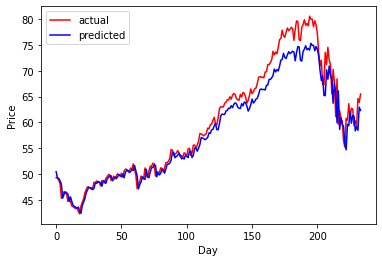

Building model for 32 units, 512 epochs, 32 batch_size, and 0.5 dropout


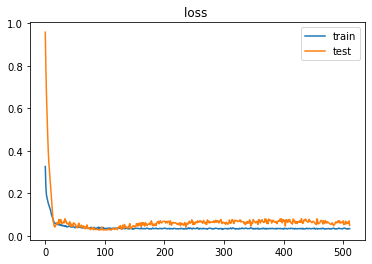

Test RMSE: 2.403


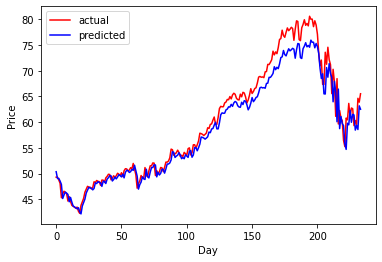

Building model for 32 units, 512 epochs, 32 batch_size, and 0.6 dropout


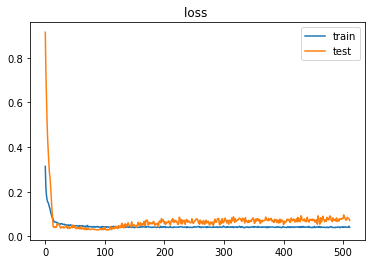

Test RMSE: 3.337


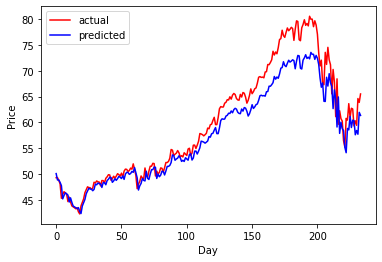

Building model for 32 units, 512 epochs, 32 batch_size, and 0.7 dropout


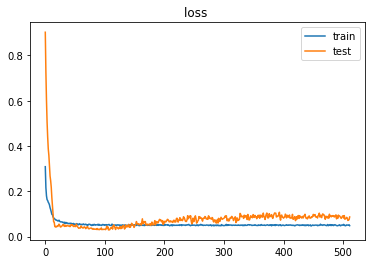

Test RMSE: 3.830


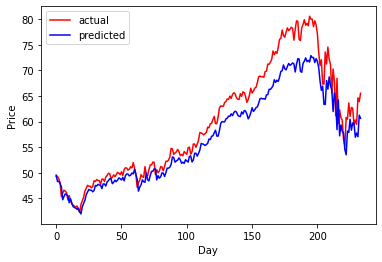

Building model for 32 units, 512 epochs, 32 batch_size, and 0.8 dropout


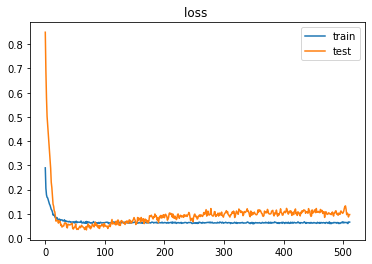

Test RMSE: 4.135


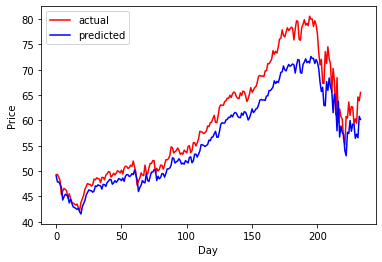

Building model for 32 units, 512 epochs, 32 batch_size, and 0.9 dropout


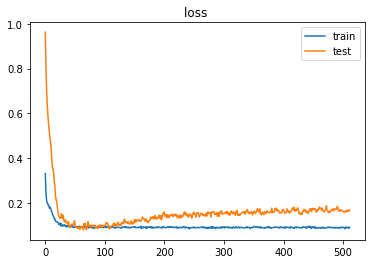

Test RMSE: 6.738


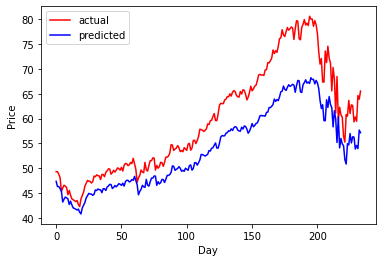


Optimized test RMSE of 0.1 dropout: 2.7921545472321663

Optimized test RMSE of 0.2 dropout: 2.621195015565535

Optimized test RMSE of 0.3 dropout: 2.6451610427014756

Optimized test RMSE of 0.4 dropout: 2.5820863247146018

Optimized test RMSE of 0.5 dropout: 2.402884004058984

Optimized test RMSE of 0.6 dropout: 3.3371211874063893

Optimized test RMSE of 0.7 dropout: 3.8296818719028503

Optimized test RMSE of 0.8 dropout: 4.134865585555269

Optimized test RMSE of 0.9 dropout: 6.738037640090334

Best result: 2.402884004058984 of 0.5 dropout


In [ ]:
rmseS = []
count = 0
test = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for n in test:
  model = fit_model_dropout(train_X, train_y, val_X, val_y,best_units,best_epochs,best_batch_size, n)
  rmse = model[1]
  rmseS.append(rmse)
  optimized.append([rmse,best_units,best_epochs,best_batch_size,n])
while count < len(rmseS):
  print("\nOptimized test RMSE of " + str(test[count]) +" dropout: " + str(rmseS[count]))
  count += 1
best_dropout = test[rmseS.index(min(rmseS))]
print("\nBest result: " + str(min(rmseS)) + " of " + str(best_dropout) + " dropout")

####Checking whether dropout makes any difference and comparing models with different input variables

Model with just an adjusted close:
Building model for 50 units, 50 epochs and 32 batch_size


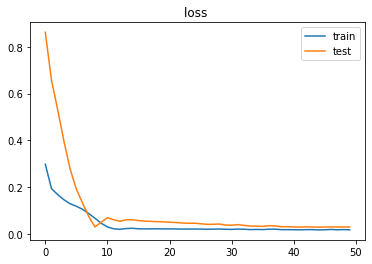

Test RMSE: 1.643


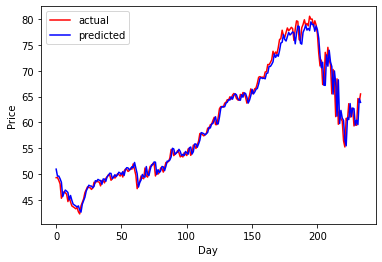

['Adj Close', 'Positive']
trained data size:  (1092, 2) 
    test data size:  (468, 2)
Before ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)', 'var2(t)']
After Drop ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)']
   var1(t-1)  var2(t-1)   var1(t)
1   0.105719   0.021116  0.085853
2   0.085853   0.021116  0.085917
3   0.085917   0.021116  0.095528
4   0.095528   0.021116  0.122232
5   0.122232   0.021116  0.123007
   var1(t-1)  var2(t-1)   var1(t)
1   0.848608   0.021116  0.809572
2   0.809572   0.000000  0.809849
3   0.809849   0.021116  0.794707
4   0.794707   0.021116  0.775393
5   0.775393   0.021116  0.695485
Model with an adjusted close and positive:
Building model for 50 units, 50 epochs and 32 batch_size


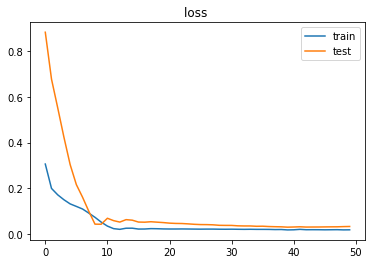

Test RMSE: 1.705


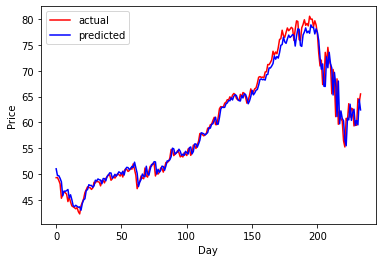

['Adj Close', 'Open']
trained data size:  (1092, 2) 
    test data size:  (468, 2)
Before ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)', 'var2(t)']
After Drop ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)']
   var1(t-1)  var2(t-1)   var1(t)
1   0.105719   0.151939  0.085853
2   0.085853   0.129919  0.085917
3   0.085917   0.117488  0.095528
4   0.095528   0.122176  0.122232
5   0.122232   0.136596  0.123007
   var1(t-1)  var2(t-1)   var1(t)
1   0.848608   0.811834  0.809572
2   0.809572   0.823128  0.809849
3   0.809849   0.794857  0.794707
4   0.794707   0.784202  0.775393
5   0.775393   0.763035  0.695485
Model with an adjusted close and open:
Building model for 50 units, 50 epochs and 32 batch_size


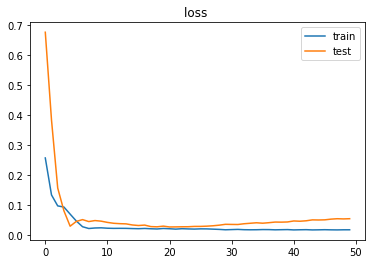

Test RMSE: 2.716


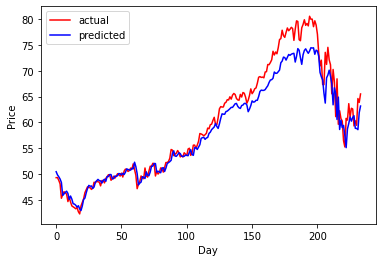

In [ ]:
count = 0
best_choice = []
while count < len(optimized): #picking the best performing hyperparameters
  if count == 0:
    best_choice = optimized[count]
    count += 1
  else:
    if optimized[count][0] < best_choice[0]:
      best_choice = optimized[count]
      count += 1
    else:
      count += 1
if len(best_choice) == 4 or len(best_choice) == 5 and best_choice[4] in range(1,10): #if it's without dropout or if it's with lag
  print("Model with just an adjusted close:")
  model_adj_close = fit_model(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3])
  train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close", "Positive"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
  ValTest_IX = round(test_X.shape[0] / 2)
  val_X = test_X[:ValTest_IX]
  val_y = test_y[:ValTest_IX]
  test_X = test_X[ValTest_IX:]
  test_y = test_y[ValTest_IX:]
  print("Model with an adjusted close and positive:")
  model_adj_close_pos = fit_model(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3])
  train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close", "Open"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
  ValTest_IX = round(test_X.shape[0] / 2)
  val_X = test_X[:ValTest_IX]
  val_y = test_y[:ValTest_IX]
  test_X = test_X[ValTest_IX:]
  test_y = test_y[ValTest_IX:]
  print("Model with an adjusted close and open:")
  model_adj_close_open = fit_model(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3])
elif len(best_choice) == 5 and best_choice[4] in np.linspace(0,1,11): #if it's with dropout
  print("Model with just an adjusted close:")
  model_adj_close = fit_model_dropout(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3], best_choice[4])
  train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close", "Positive"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
  ValTest_IX = round(test_X.shape[0] / 2)
  val_X = test_X[:ValTest_IX]
  val_y = test_y[:ValTest_IX]
  test_X = test_X[ValTest_IX:]
  test_y = test_y[ValTest_IX:]
  print("Model with an adjusted close and positive:")
  model_adj_close_pos = fit_model_dropout(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3], best_choice[4])
  train_X, train_y, test_X, test_y, scaler = pre_process(apple_df, input_vars=["Adj Close", "Open"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
  ValTest_IX = round(test_X.shape[0] / 2)
  val_X = test_X[:ValTest_IX]
  val_y = test_y[:ValTest_IX]
  test_X = test_X[ValTest_IX:]
  test_y = test_y[ValTest_IX:]
  print("Model with an adjusted close and open:")
  model_adj_close_open = fit_model_dropout(train_X,train_y,val_X,val_y,best_choice[1],best_choice[2], best_choice[3], best_choice[4])
else:
  print("Something is wrong!")

####Tesla news sentimental analysis

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


% of positive news=  13.791146424517594
% of negative news=  5.959137343927355


,Open,High,Low,Close,Volume,title,Date,Adj Close,Comp,Negative,Neutral,Positive
1761,1061.329956,1095.550049,1053.150024,1070.339966,15680300,"For Months, Tesla and Ark Innovation Shares Mo...",2021-12-30,1070.339966,0.9698,0.019,0.802,0.9698


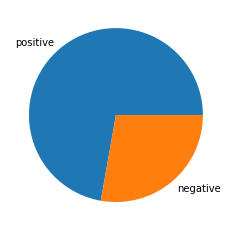

In [ ]:
tesla = news_sentiment_analysis('tesla','TSLA','2015-01-01','2021-12-31',20)
tesla.news
tesla.plot_news()
tesla_stock = tesla.stocks[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
tesla_news = tesla.news.copy()
tesla_df = pd.concat([tesla_stock, tesla_news], axis=1)
tesla_df.tail(1)


####Predicting tesla data using a model from apple using adjusted close only

['Adj Close']
trained data size:  (1092, 1) 
    test data size:  (671, 1)
Before ----  ['var1(t-1)', 'var1(t)']
After Drop ----  ['var1(t-1)', 'var1(t)']
   var1(t-1)   var1(t)
1   0.313430  0.275225
2   0.275225  0.280156
3   0.280156  0.278788
4   0.278788  0.277421
5   0.277421  0.261012
   var1(t-1)   var1(t)
1   0.462727  0.428418
2   0.428418  0.419218
3   0.419218  0.407368
4   0.407368  0.397174
5   0.397174  0.345336
Test RMSE: 42.652


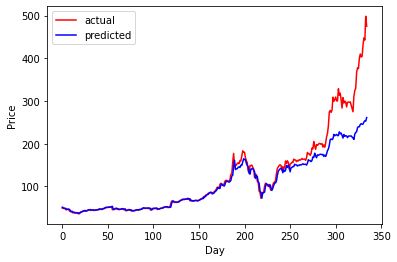

In [ ]:
train_X, train_y, test_X, test_y, scaler = pre_process(tesla_df, input_vars=["Adj Close"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
ValTest_IX = round(test_X.shape[0] / 2)
val_X = test_X[:ValTest_IX]
val_y = test_y[:ValTest_IX]
test_X = test_X[ValTest_IX:]
test_y = test_y[ValTest_IX:]
yhat = model_adj_close[0].predict(val_X)
inv_yhat = concatenate((yhat, yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = val_y.reshape((len(val_y), 1))
inv_y = concatenate((test_y, test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
plt.plot(inv_y, color = 'red', label = 'actual')
plt.plot(inv_yhat, color = 'blue', label = 'predicted')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

####Predicting tesla data using a model from apple using adjusted close and positive

['Adj Close', 'Positive']
trained data size:  (1092, 2) 
    test data size:  (671, 2)
Before ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)', 'var2(t)']
After Drop ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)']
   var1(t-1)  var2(t-1)   var1(t)
1   0.313430   0.345548  0.275225
2   0.275225   0.345548  0.280156
3   0.280156   0.345548  0.278788
4   0.278788   0.345548  0.277421
5   0.277421   0.345548  0.261012
   var1(t-1)  var2(t-1)   var1(t)
1   0.462727   0.345548  0.428418
2   0.428418   0.345548  0.419218
3   0.419218   0.345548  0.407368
4   0.407368   0.345548  0.397174
5   0.397174   0.345548  0.345336
Test RMSE: 47.180


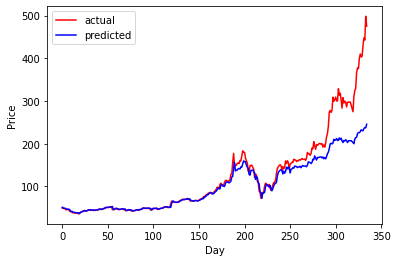

In [ ]:
train_X, train_y, test_X, test_y, scaler = pre_process(tesla_df, input_vars=["Adj Close", "Positive"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
ValTest_IX = round(test_X.shape[0] / 2)
val_X = test_X[:ValTest_IX]
val_y = test_y[:ValTest_IX]
test_X = test_X[ValTest_IX:]
test_y = test_y[ValTest_IX:]
yhat = model_adj_close_pos[0].predict(val_X)
inv_yhat = concatenate((yhat, yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = val_y.reshape((len(val_y), 1))
inv_y = concatenate((test_y, test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
plt.plot(inv_y, color = 'red', label = 'actual')
plt.plot(inv_yhat, color = 'blue', label = 'predicted')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

####Predicting tesla data using a model from apple using adjusted close and open

['Adj Close', 'Open']
trained data size:  (1092, 2) 
    test data size:  (671, 2)
Before ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)', 'var2(t)']
After Drop ----  ['var1(t-1)', 'var2(t-1)', 'var1(t)']
   var1(t-1)  var2(t-1)   var1(t)
1   0.313430   0.329623  0.275225
2   0.275225   0.295576  0.280156
3   0.280156   0.277203  0.278788
4   0.278788   0.290666  0.277421
5   0.277421   0.288456  0.261012
   var1(t-1)  var2(t-1)   var1(t)
1   0.462727   0.440725  0.428418
2   0.428418   0.468470  0.419218
3   0.419218   0.428121  0.407368
4   0.407368   0.407906  0.397174
5   0.397174   0.398699  0.345336
Test RMSE: 67.047


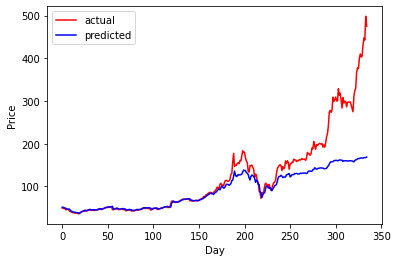

In [ ]:
train_X, train_y, test_X, test_y, scaler = pre_process(tesla_df, input_vars=["Adj Close", "Open"], output_var=["Adj Close"], lags=best_lag , split=0.7, lstm=True)
ValTest_IX = round(test_X.shape[0] / 2)
val_X = test_X[:ValTest_IX]
val_y = test_y[:ValTest_IX]
test_X = test_X[ValTest_IX:]
test_y = test_y[ValTest_IX:]
yhat = model_adj_close_open[0].predict(val_X)
inv_yhat = concatenate((yhat, yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = val_y.reshape((len(val_y), 1))
inv_y = concatenate((test_y, test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
plt.plot(inv_y, color = 'red', label = 'actual')
plt.plot(inv_yhat, color = 'blue', label = 'predicted')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()